Задача 7: Кристаллическое твердое тело никогда не является совершенным, а содержит разнообразные дефекты. Простейшим дефектом является вакансия решетки, т.е. отсутствие атома в узле решетки и помещение дополнительного атома на поверхность. При конечной температуре в реальном кристалле всегда имеется некоторое число решеточных вакансий. Во многих случаях вакансия диффундирует (движется), меняясь местами с соседними атомами случайным образом. Предположите, что вакансия в начальный момент времени t=0 расположена в центре окружности радиусом r, определите время, за которое вакансия достигает поверхности металла, находящейся нарасстоянии r(rвыбрать произвольно)

In [39]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [40]:
def circle(R, x=None, y=None):
    if x:
        return np.sqrt(R*R-x*x)
    if y:
        return np.sqrt(R*R-x*x)

In [152]:
# Размер решетки
r = 10 # Радиус окружности
N = 100 # Кол-во точек для отрисовки окружности
n = 5 # Кол-во точек сетки в каждой четверти оси
X =  np.linspace(-r, r, N)
Y = [circle(r, x) for x in X]

xv, yv = np.meshgrid(np.linspace(-r, r, 2*n-1), np.linspace(-r, r, 2*n-1))
         
defect_coords = [0, 0]

In [153]:
# Нарисуем круг с радиусом r
plt.plot(X, Y, color='b')
plt.plot(X, [-y for y in Y], color='b')
# Нарисуем сетку и начальное положение дефекта
plt.scatter(xv, yv)
plt.scatter(defect_coords[0], defect_coords[1], color='r')
plt.show()

### События, которые могут произойти с дефектом:
#### Поменяться с атомом справа;
#### Поменяться с атомом слева;
#### Поменяться с атомом сверху;
#### Поменяться с атомом снизу;
#### Остаться на месте;


In [160]:
h = r/(n-1)
events = [
    [-h, 0], # Шаг назад по оси OX
    [h, 0],  # Шаг вперед по оси OX
    [0, -h], # Шаг назад по оси OY
    [0, h],  # Шаг вперед по оси OY
    [0, 0]   # Остаться на месте
]

In [175]:
import time
def real_time_plotting(way):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()
    
    #iterate - plot, erase
    for x, y in way:
        ax.clear() 
        plt.scatter(xv, yv)
        ax.plot(X, Y, color='b')
        ax.plot(X, [-y for y in Y], color='b')
        ax.scatter(x, y)
        fig.canvas.draw()    
        time.sleep(0.08)    


Всего понадобилось 21 шагов


<IPython.core.display.Javascript object>


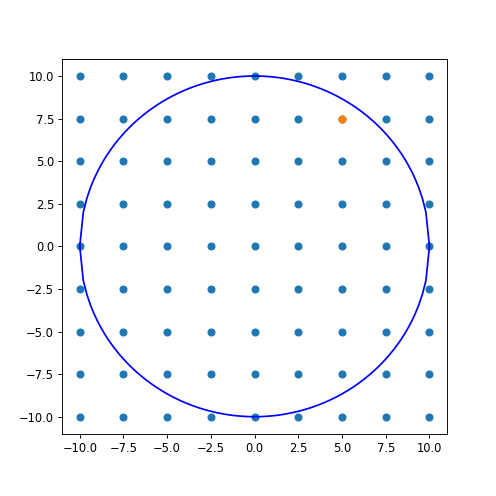

In [177]:
defect_coords = [0, 0]
way = []
step = 0
while True:
    way.append(defect_coords.copy())
    rand_step = np.random.randint(0, len(events))
    defect_coords[0] += events[rand_step][0]
    defect_coords[1] += events[rand_step][1] 
    if defect_coords[0]**2 + defect_coords[1]**2 > r**2:
        break
    step += 1

print("Всего понадобилось {} шагов".format(step))
real_time_plotting(way)